In [1]:
import keras
from keras.models import Model
from data import id_map, preprocess, get_data, words2id, id2words, seq_length, vocab_size
from network import network
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

/home/albert/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


max length of sequece: 7
the kinds of all words: 118


In [2]:
learning_rate = 1e-3        # learning rate
epochs = 100                # total epochs
batch_size = 512            # batch size
target_length = 2           # the length of output sequence
embedding_size = 64         # the size of embedding layer's units
attention_units = 64        # the size of attention layer's units
encoder_hidden_size = 64    # the size of encoder LSTM's units
decoder_hidden_size1 = 128  # the size of 1st decoder LSTM's units
decoder_hidden_size2 = 64   # the size of 2nd decoder LSTM's units

model = network(seq_length, vocab_size, target_length, embedding_size, attention_units,
                encoder_hidden_size, decoder_hidden_size1, decoder_hidden_size2)
model.load_weights("model/model.h5")

/home/albert/Documents/Project/TimeAttentionKeras/network.py:88: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("lo...)`
  model = Model(inputs=[encoder_input, decoder_input, fcn_input, mask], output=decoder_logits)


In [3]:
encoder_input = model.get_layer("encoder_input").get_input_at(0)
decoder_input = model.get_layer("decoder_input").get_input_at(0)
mask = model.get_layer("mask").get_input_at(0)
output = model.get_layer("logits").get_output_at(0)
attention = model.get_layer("attention").output

test_model = Model(inputs=[encoder_input, decoder_input, mask], outputs=[output, attention])

In [4]:
def test(s, cmap="Blues"):
    # input
    s = preprocess([s])
    X_data, mask_data = words2id(preprocess(s), seq_length)
    y_input = ["<hour> <min>"] * len(s)
    y_input, _ = words2id(y_input, 2)
    # prediction
    result, a = test_model.predict([X_data, y_input, mask_data])
    result = id2words(result.argmax(2))
    print("the result is:", ";".join(result))
    # heat map
    f, ax = plt.subplots(figsize=(12, 4))
    sns.heatmap(a.reshape((2, -1)), square=True, cmap=cmap)
    ax.set_xticklabels(s[0].split(), fontsize=20)
    ax.xaxis.set_ticks_position('top')
    ax.set_yticklabels(result[0].split(), fontsize=20)
#     plt.savefig("images/" + result[0].replace(" ", ""))
    plt.show()

the result is: 02 33


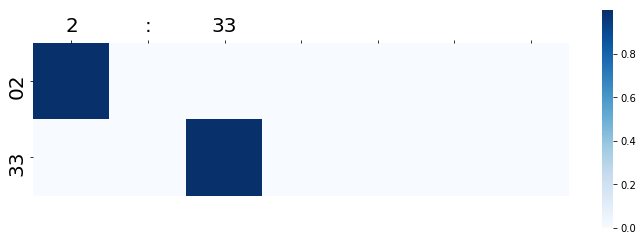

In [5]:
test("2:33", "Blues")

the result is: 08 32


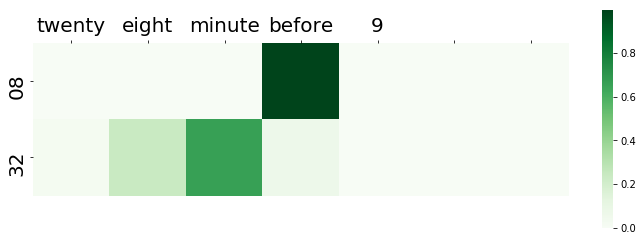

In [6]:
test("twenty eight minute before 9", "Greens")

the result is: 19 18


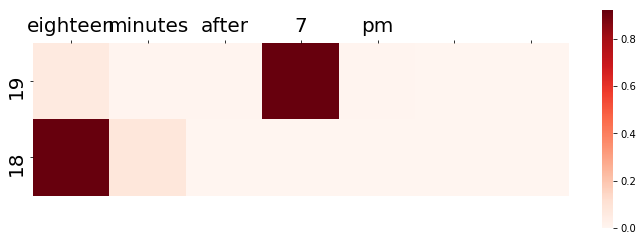

In [7]:
test("eighteen minutes after 7 pm", "Reds")

the result is: 10 28


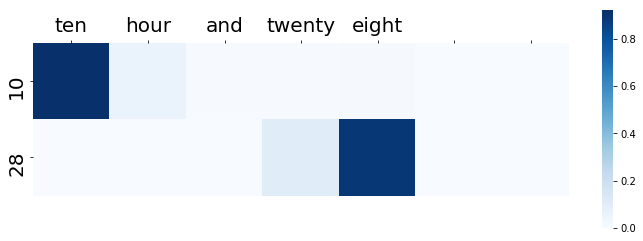

In [8]:
test("ten hour and twenty eight", "Blues")

the result is: 11 30


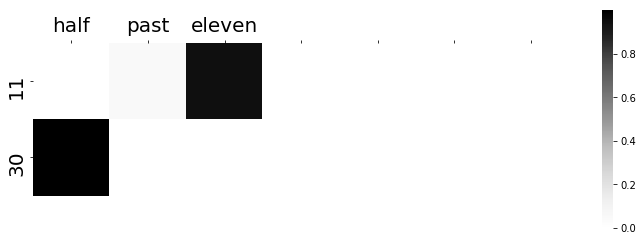

In [9]:
test("half past eleven", "Greys")

the result is: 16 45


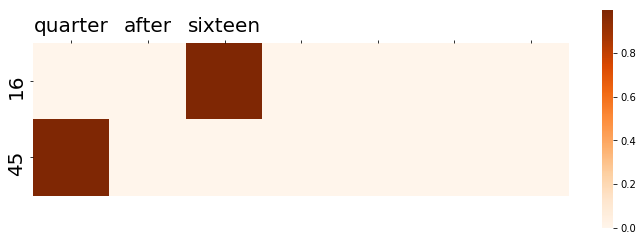

In [10]:
test("quarter after sixteen", "Oranges")